In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [14]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
p = 'p'
ns = 'ns'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
greedy = pd.read_csv('pathological-greedy.csv')
greedy = greedy.groupby([n, m,diff]).min().reset_index()
local = pd.read_csv('pathological-local.csv')
local = local.groupby([n, m,diff]).min().reset_index()
grasp = pd.read_csv('pathological-grasp.csv')
grasp = grasp.groupby([n,m,p,it,diff]).min().reset_index()
grasp2 = pd.read_csv('pathological-grasp-2.csv')
grasp2 = grasp2.groupby([n,m,p,it,diff]).min().reset_index()

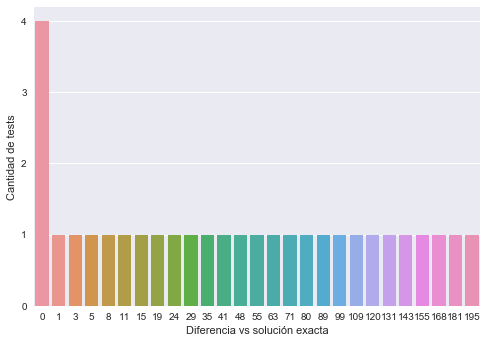

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000,360.000,195.000,13200.000
mean,102.667,128.000,63.267,7102.533
std,83.212,110.981,61.710,3629.222


In [16]:
g = sns.countplot(x=diff, data=greedy)
g.set(yticks=range(0,5))
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

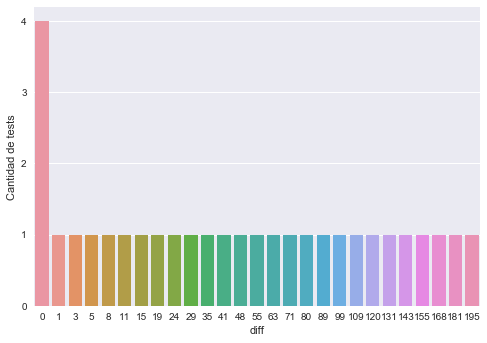

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000,360.000,195.000,46304.000
mean,102.667,128.000,63.267,25391.733
std,83.212,110.981,61.710,12556.971


In [17]:
g = sns.countplot(x=diff, data=local)
g.set(yticks=range(0,5))
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

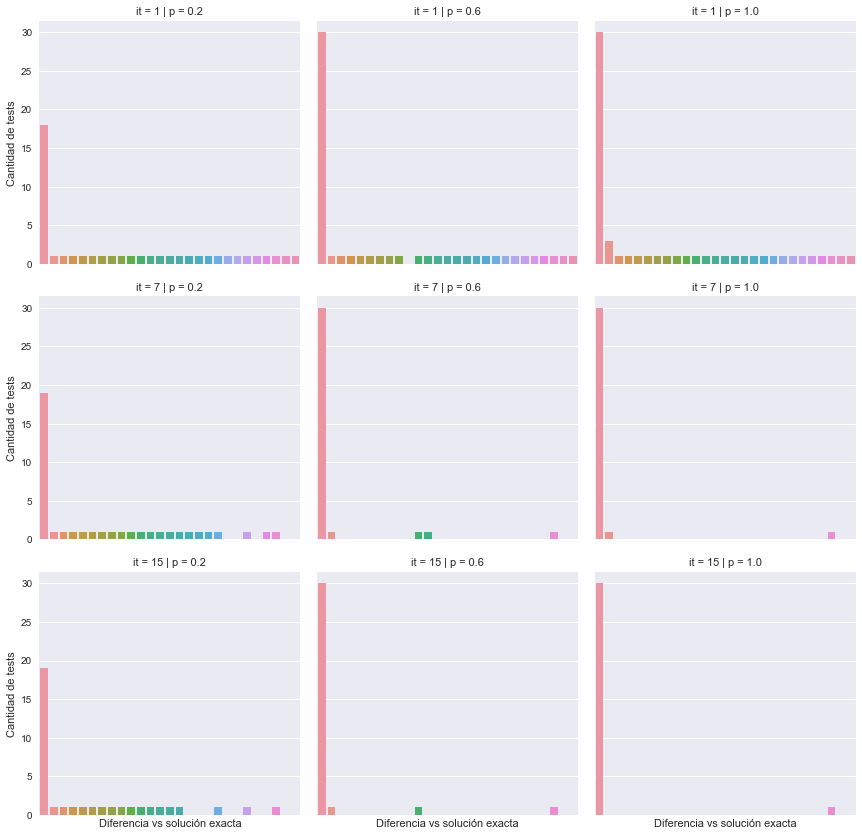

In [28]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count"
)
g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [38]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

grasp_test = grasp_test.drop(n,1).drop(m,1)
graspCopy = grasp_test.copy()
graspCopy.columns = [p,it,'dif',ns]

grasp_test = grasp_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp_test = grasp_test.assign(error=1)
for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its)].shape
        errcount, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its) & (graspCopy.dif > 0)].shape
        grasp_test.loc[(grasp_test.p == ps) & (grasp_test.it == its), 'error'] = errcount/count
grasp_test

p  it diff                      ns                         error
             max   mean    std       max        mean         std      
0 0.200   1  195 43.136 58.795   1185127  270624.841  330016.185 0.591
1 0.200   7  168 28.750 45.273   5662686 1424123.875 1236609.935 0.525
2 0.200  15  168 20.972 39.199  14800435 3161085.972 3122641.087 0.472
3 0.600   1  195 33.982 55.472   1184289  260305.182  296892.605 0.455
4 0.600   7  168  7.206 29.831   7958280 2109019.176 2165197.589 0.118
5 0.600  15  168  6.182 29.680  19987087 4958763.030 5158385.075 0.091
6 1.000   1  195 32.759 54.334   1187642  248043.017  291666.058 0.483
7 1.000   7  168  5.281 29.693  10044562 2540010.812 2686385.022 0.062
8 1.000  15  168  5.419 30.174  22387163 5906853.194 5985210.232 0.032

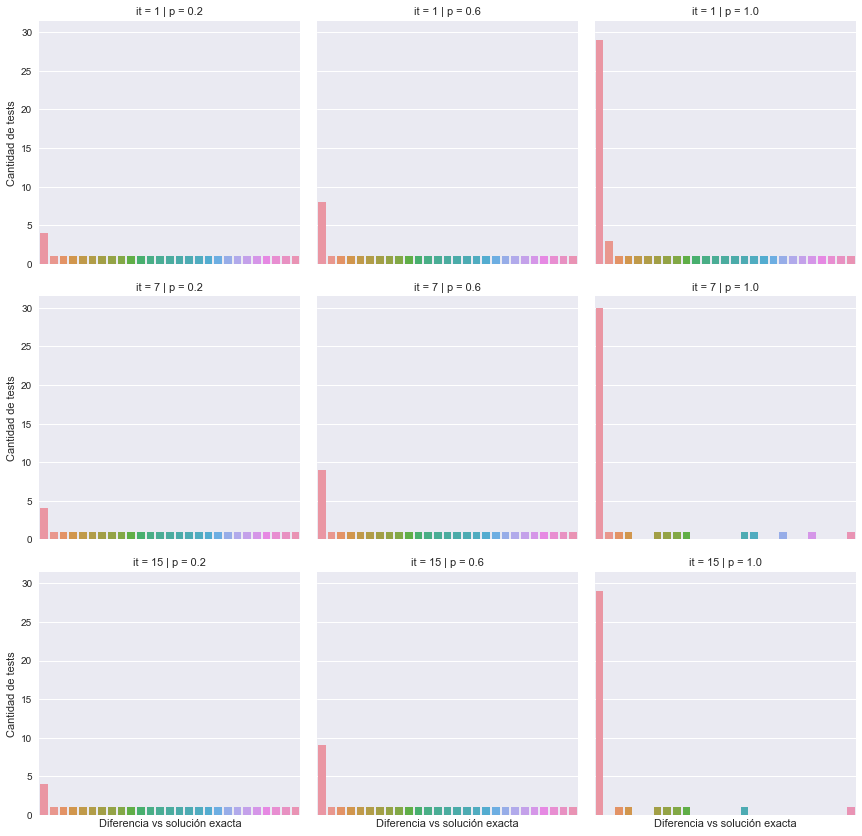

In [41]:
grasp2_test = grasp2[((grasp2.p == 0.2) | (grasp2.p == 0.6) | (grasp2.p == 1))
                    & ((grasp2.it == 1) | (grasp2.it == 7) | (grasp2.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp2_test,
    col=p, row=it,
    kind="count"
)
g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [40]:
grasp2_test = grasp2[((grasp2.p == 0.2) | (grasp2.p == 0.6) | (grasp2.p == 1))
                    & ((grasp2.it == 1) | (grasp2.it == 7) | (grasp2.it == 15))]

grasp2_test = grasp2_test.drop(n,1).drop(m,1)
grasp2Copy = grasp2_test.copy()
grasp2Copy.columns = [p,it,'dif',ns]

grasp2_test = grasp2_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp2_test = grasp2_test.assign(error=1)
for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = grasp2Copy[(grasp2Copy.p == ps) & (grasp2Copy.it == its)].shape
        errcount, _ = grasp2Copy[(grasp2Copy.p == ps) & (grasp2Copy.it == its) & (grasp2Copy.dif > 0)].shape
        grasp2_test.loc[(grasp2_test.p == ps) & (grasp2_test.it == its), 'error'] = errcount/count
grasp2_test

p  it diff                      ns                         error
             max   mean    std       max        mean         std      
0 0.200   1  195 63.267 61.710    142824   66185.733   39564.434 0.867
1 0.200   7  195 63.267 61.710   2286236  975937.900  709071.911 0.867
2 0.200  15  195 63.267 61.710   4995287 2254688.967 1643896.792 0.867
3 0.600   1  195 55.824 61.438   1252104  185755.765  335755.015 0.765
4 0.600   7  195 54.229 61.259   3533591 1430836.686 1026854.961 0.743
5 0.600  15  195 54.229 61.259   6544983 3068547.657 2100430.646 0.743
6 1.000   1  195 33.333 54.639   1675129  285059.123  374481.795 0.491
7 1.000   7  195 16.524 42.012   6259474 1683083.119 1542674.153 0.286
8 1.000  15  195  9.757 33.986  15685527 4033435.459 3998722.322 0.216